In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard_data.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation of numerical features')

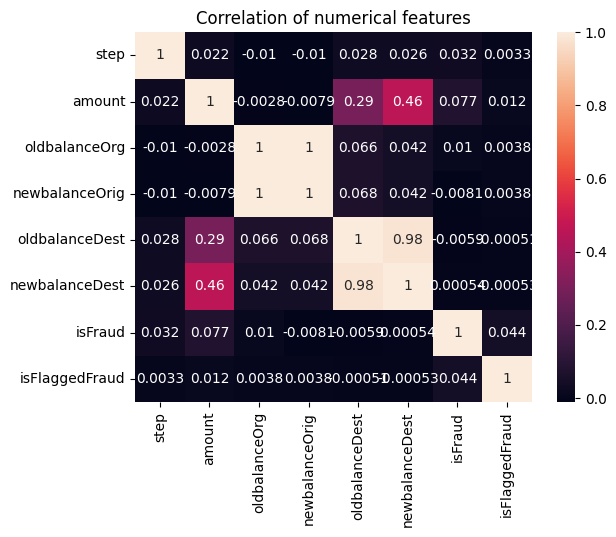

In [11]:
correlation=df.corr(numeric_only=True)
sns.heatmap(data=correlation,annot=True)
plt.title("Correlation of numerical features")

In [12]:
filtered_df = df.loc[:, df.nunique().between(2, 50)]
filtered_df

,type,isFraud,isFlaggedFraud
0,PAYMENT,0,0
1,PAYMENT,0,0
2,TRANSFER,1,0
3,CASH_OUT,1,0
4,PAYMENT,0,0
...,...,...,...
6362615,CASH_OUT,1,0
6362616,TRANSFER,1,0
6362617,CASH_OUT,1,0
6362618,TRANSFER,1,0


In [13]:
n_cols = len(filtered_df.columns)  # Total columns to plot

In [14]:
for i,col in enumerate(filtered_df.columns):
    print(f"{i}:{col}")

0:type
1:isFraud
2:isFlaggedFraud


In [15]:
def plot_columns(df):
    filtered_df=df.loc[:,df.nunique().between(2,50)]
    plt.figure(figsize=(16,6))
    for i,col in enumerate(filtered_df.columns):
        plt.subplot(1,3,i+1)
        if filtered_df[col].dtype=='object':
            filtered_df[col].value_counts().plot(kind='bar',title=col)
        else:
            filtered_df[col].plot(kind='hist',title=col)
        plt.ylabel("Counts")

    plt.show()

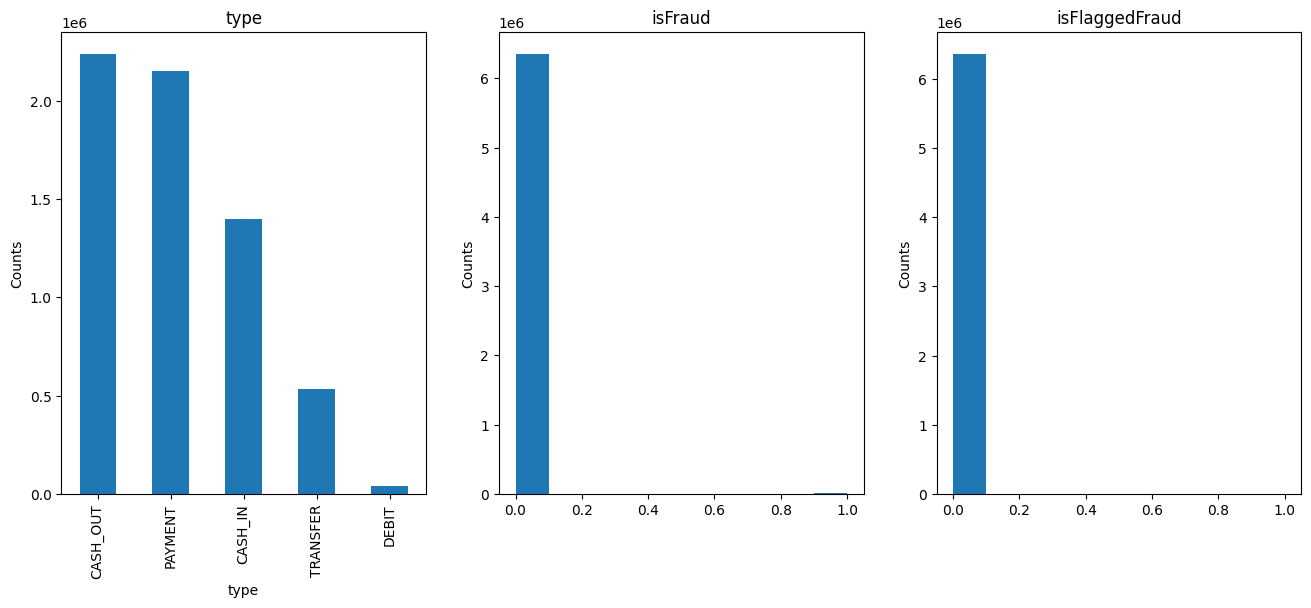

In [16]:
plot_columns(df)

In [17]:
fraud_rate_by_type=df.groupby('type')['isFraud'].mean().reset_index()

C:\Users\1\AppData\Local\Temp\ipykernel_15556\4143808698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_by_type, x='type', y='isFraud', palette='viridis')


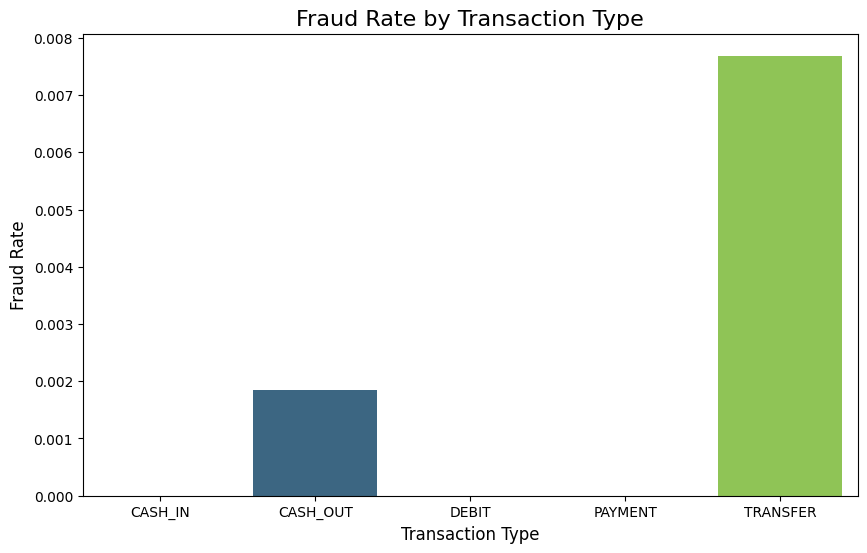

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_rate_by_type, x='type', y='isFraud', palette='viridis')
plt.title('Fraud Rate by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xticks()
plt.show()

In [19]:
fraud_by_step=df[df['isFraud']==1].groupby('step').size().reset_index(name='FraudTransactions')
total_by_step=df.groupby('step').size().reset_index(name="TotalTransactions")

fraud_by_step=fraud_by_step.merge(total_by_step,on='step',how='left')
fraud_by_step['Fraud_Rate']=fraud_by_step['FraudTransactions']/fraud_by_step['TotalTransactions']
fraud_by_step

,step,FraudTransactions,TotalTransactions,Fraud_Rate
0,1,16,2708,0.005908
1,2,8,1014,0.007890
2,3,4,552,0.007246
3,4,10,565,0.017699
4,5,6,665,0.009023
...,...,...,...,...
736,739,10,10,1.000000
737,740,6,6,1.000000
738,741,22,22,1.000000
739,742,14,14,1.000000


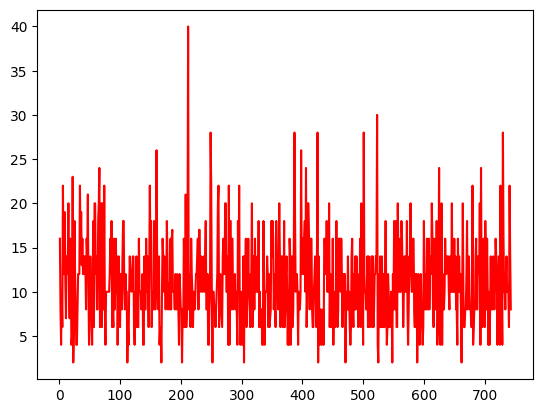

In [20]:
plt.plot(fraud_by_step['step'], fraud_by_step['FraudTransactions'], label='FraudTransactions', color='red')

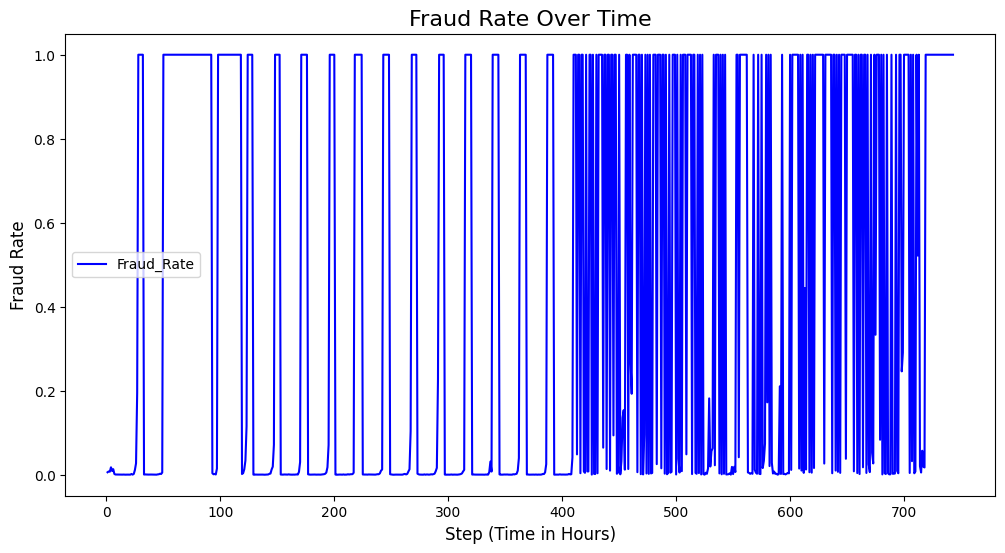

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(fraud_by_step['step'], fraud_by_step['Fraud_Rate'], label='Fraud_Rate', color='blue')
plt.title('Fraud Rate Over Time', fontsize=16)
plt.xlabel('Step (Time in Hours)', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.legend()
plt.show()


In [22]:
#accounts that appear multiple times in fraudulent transactions.
fraud_df=df[df['isFraud']==1]
orig_fraud_counts=fraud_df['nameOrig'].value_counts().reset_index()
orig_fraud_counts.columns = ['Origination Account', 'Fraud Count']
orig_fraud_counts.head(10)

,Origination Account,Fraud Count
0,C1280323807,1
1,C1305486145,1
2,C840083671,1
3,C1420196421,1
4,C2101527076,1
5,C1039979813,1
6,C2089752665,1
7,C1614818636,1
8,C40604503,1
9,C1970706589,1


In [23]:
# destination accounts that appear multiple times in fraudulent transactions.
dest_fraud_counts=fraud_df['nameDest'].value_counts().reset_index()
dest_fraud_counts.columns = ['Destination Account', 'Fraud Count']
dest_fraud_counts.head(10)

,Destination Account,Fraud Count
0,C967226405,2
1,C1601170327,2
2,C650699445,2
3,C105660024,2
4,C1981613973,2
5,C803116137,2
6,C505532836,2
7,C964377943,2
8,C200064275,2
9,C1259079602,2


C:\Users\1\AppData\Local\Temp\ipykernel_15556\2991786249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orig_fraud_counts.head(10), x='Fraud Count', y='Origination Account', palette='coolwarm')


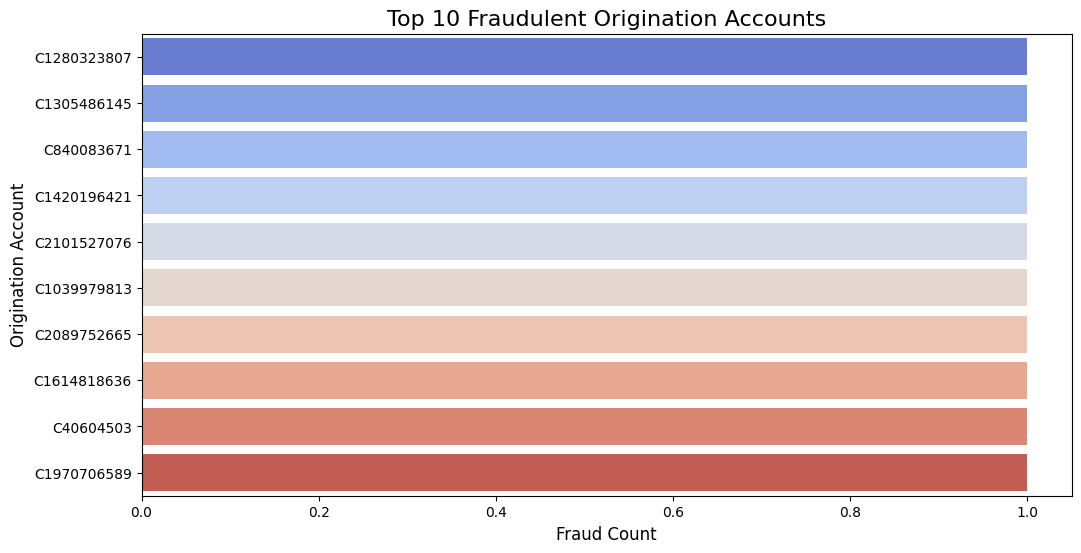

In [24]:
# Plot the top 10 fraudulent origination accounts
plt.figure(figsize=(12, 6))
sns.barplot(data=orig_fraud_counts.head(10), x='Fraud Count', y='Origination Account', palette='coolwarm')
plt.title('Top 10 Fraudulent Origination Accounts', fontsize=16)
plt.xlabel('Fraud Count', fontsize=12)
plt.ylabel('Origination Account', fontsize=12)
plt.show()


C:\Users\1\AppData\Local\Temp\ipykernel_15556\1967712829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dest_fraud_counts.head(10), x='Fraud Count', y='Destination Account', palette='coolwarm')


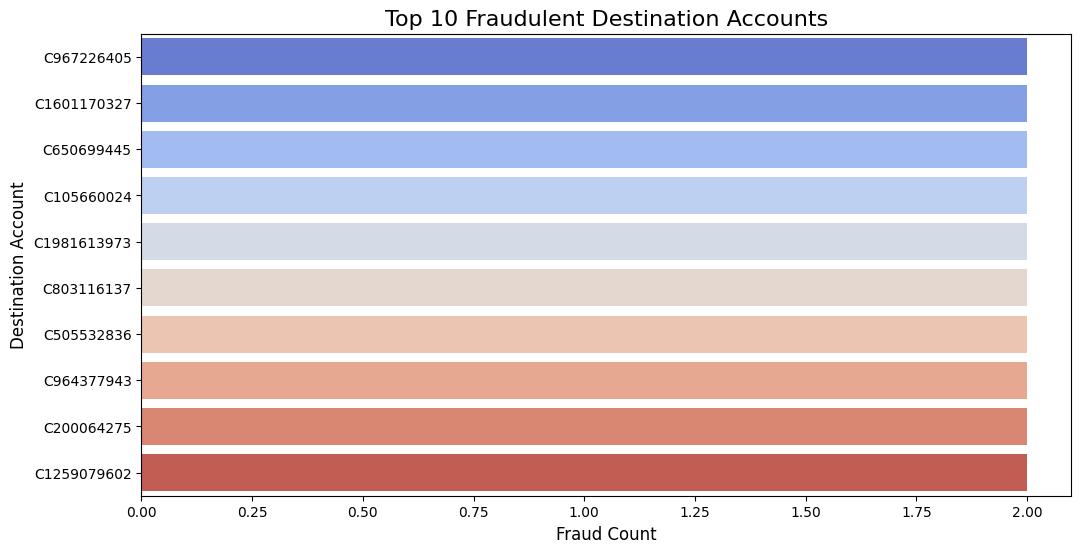

In [25]:
# Plot the top 10 fraudulent destination accounts
plt.figure(figsize=(12, 6))
sns.barplot(data=dest_fraud_counts.head(10), x='Fraud Count', y='Destination Account', palette='coolwarm')
plt.title('Top 10 Fraudulent Destination Accounts', fontsize=16)
plt.xlabel('Fraud Count', fontsize=12)
plt.ylabel('Destination Account', fontsize=12)
plt.show()


In [26]:
len(df[df['isFraud']==1])

8213

In [27]:
fraud_percentage=(len(df[df['isFraud']==1])/len(df[df['isFraud']==0]))*100

In [28]:
print(f"Fraud Percentage: {fraud_percentage}%")

Fraud Percentage: 0.129248881917699%


# Model Building

In [29]:
# Encoding the type column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
oh=OneHotEncoder()
encoded_type=oh.fit_transform(df[['type']]).toarray()
encoded_type

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], shape=(6362620, 5))

In [30]:
encoded_type_df=pd.DataFrame(encoded_type,columns=oh.get_feature_names_out(['type']))
encoded_type_df.rename(columns={'type_CASH_IN':'CASH_IN','type_CASH_OUT':'CASH_OUT','type_DEBIT':'DEBIT','type_PAYMENT':'PAYMENT','type_TRANSFER':'TRANSFER'},inplace=True)
encoded_type_df

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
6362615,0.0,1.0,0.0,0.0,0.0
6362616,0.0,0.0,0.0,0.0,1.0
6362617,0.0,1.0,0.0,0.0,0.0
6362618,0.0,0.0,0.0,0.0,1.0


In [31]:
new_df=pd.concat([df.drop('type',axis=1),encoded_type_df],axis=1)
new_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0


In [32]:
# Dividing into dependent and independent features
x=new_df.drop('isFraud',axis=1)
y=new_df['isFraud']

In [33]:
num_features =x.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

# Logistic Regression and Decision Tree

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier()
}
best_model_name = ''
best_model_score = 0
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_classificationreport = classification_report(y_train, y_train_pred)
    model_train_confusionmatrix = confusion_matrix(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_classificationreport = classification_report(y_test, y_test_pred)
    model_test_confusionmatrix = confusion_matrix(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Classification Report:{} '.format(model_train_classificationreport))
    print('- Confusion Matrix:{} '.format(model_train_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- Classification Report:{} '.format(model_test_classificationreport))
    print('- Confusion Matrix:{} '.format(model_test_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_test_rocauc_score))
    if model_test_accuracy > best_model_score:
        best_model_name = list(models.keys())[i]
        best_model_score = model_test_accuracy


    print('='*35)
    print('\n')
print(f"The best model based on ROC-AUC score is: {best_model_name} with a score of {best_model_score:.4f}")

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9992
- Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       0.91      0.40      0.56      6593

    accuracy                           1.00   5090096
   macro avg       0.96      0.70      0.78   5090096
weighted avg       1.00      1.00      1.00   5090096
 
- Confusion Matrix:[[5083252     251]
 [   3944    2649]] 
- ROC-AUC Score: 0.7009
----------------------------------
Model performance for Test set
- Accuracy: 0.9992
- Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.39      0.54      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524
 
- Confusion Matrix:[[1270838      66]
 [    992     6

In [43]:
models[best_model_name]

DecisionTreeClassifier()

In [44]:
import joblib

In [45]:
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model_decision_tree.pkl')
print(f"Decision Tree model saved as 'best_model_decision_tree.pkl'")

Decision Tree model saved as 'best_model_decision_tree.pkl'


# XGBoost

In [ ]:
models={
    "XGBoost":XGBClassifier()
}
best_model_name = ''
best_model_score = 0
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_classificationreport = classification_report(y_train, y_train_pred)
    model_train_confusionmatrix = confusion_matrix(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_classificationreport = classification_report(y_test, y_test_pred)
    model_test_confusionmatrix = confusion_matrix(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Classification Report:{} '.format(model_train_classificationreport))
    print('- Confusion Matrix:{} '.format(model_train_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- Classification Report:{} '.format(model_test_classificationreport))
    print('- Confusion Matrix:{} '.format(model_test_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_test_rocauc_score))

    if model_test_accuracy > best_model_score:
        best_model_name = list(models.keys())[i]
        best_model_score = model_test_accuracy
    print('='*35)
    print('\n')
    print(f"The best model based on ROC-AUC score is: {best_model_name} with a score of {best_model_score:.4f}")

# Random Forest

In [ ]:
models={
    "Random Forest":RandomForestClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_classificationreport = classification_report(y_train, y_train_pred)
    model_train_confusionmatrix = confusion_matrix(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_classificationreport = classification_report(y_test, y_test_pred)
    model_test_confusionmatrix = confusion_matrix(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Classification Report:{} '.format(model_train_classificationreport))
    print('- Confusion Matrix:{} '.format(model_train_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- Classification Report:{} '.format(model_test_classificationreport))
    print('- Confusion Matrix:{} '.format(model_test_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

# K Nearest Neighbours

In [ ]:
models={
    "KNN":KNeighboursClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_classificationreport = classification_report(y_train, y_train_pred)
    model_train_confusionmatrix = confusion_matrix(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_classificationreport = classification_report(y_test, y_test_pred)
    model_test_confusionmatrix = confusion_matrix(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Classification Report:{} '.format(model_train_classificationreport))
    print('- Confusion Matrix:{} '.format(model_train_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- Classification Report:{} '.format(model_test_classificationreport))
    print('- Confusion Matrix:{} '.format(model_test_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

# Support Vector Machines

In [ ]:
models={
    "svc":SVC()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_classificationreport = classification_report(y_train, y_train_pred)
    model_train_confusionmatrix = confusion_matrix(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_classificationreport = classification_report(y_test, y_test_pred)
    model_test_confusionmatrix = confusion_matrix(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Classification Report:{} '.format(model_train_classificationreport))
    print('- Confusion Matrix:{} '.format(model_train_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- Classification Report:{} '.format(model_test_classificationreport))
    print('- Confusion Matrix:{} '.format(model_test_confusionmatrix))
    print('- ROC-AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

# Model that performs best

In [41]:
best_model_name

'Decision Tree'